In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('agri_energy_merged.csv')
df.head()

state district  year  month  solar_mw_district  wind_mw  bioenergy_mw  \
0  assam    baksa  2015      1                0.0      0.0           1.2   
1  assam    baksa  2015      2                0.0      0.0           1.2   
2  assam    baksa  2015      3                0.0      0.0           1.2   
3  assam    baksa  2015      4                0.0      0.0           1.2   
4  assam    baksa  2015      5                0.0      0.0           1.2   

   solar_pumps_installed  estimated_co2_reduction_tonnes  
0                    0.0                          1080.0  
1                    0.0                          1080.0  
2                    0.0                          1080.0  
3                    0.0                          1080.0  
4                    0.0                          1080.0

In [7]:
df.columns

Index(['state', 'district', 'year', 'month', 'solar_mw_district', 'wind_mw',
       'bioenergy_mw', 'solar_pumps_installed',
       'estimated_co2_reduction_tonnes'],
      dtype='object')

## Time series 
> shows the adoption trend and mitigation impact over years.

The above chart highlights regional inequality in renewable deployment.

In [12]:
import seaborn as sns

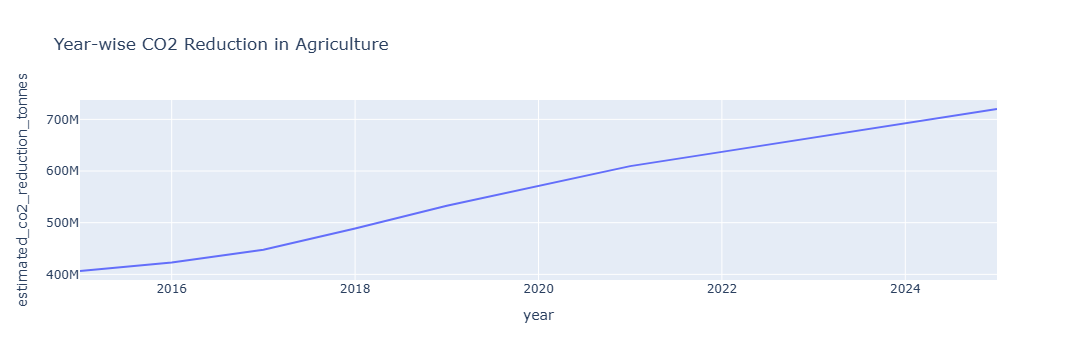

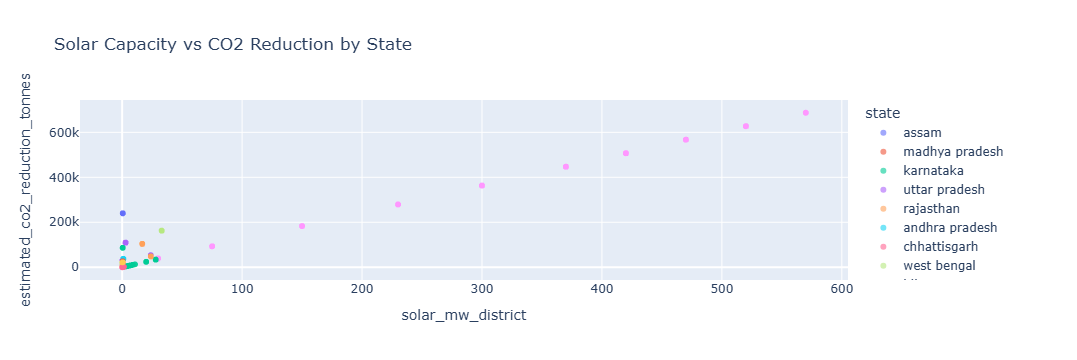

In [21]:
import plotly.express as px

# Time series CO2
yearly = df.groupby("year")["estimated_co2_reduction_tonnes"].sum().reset_index()

fig1 = px.line(yearly, x="year", y="estimated_co2_reduction_tonnes",
               title="Year-wise CO2 Reduction in Agriculture")
fig1.show()

# Scatter interactive
fig2 = px.scatter(df,
                  x="solar_mw_district",
                  y="estimated_co2_reduction_tonnes",
                  color="state",
                  title="Solar Capacity vs CO2 Reduction by State",
                  opacity=0.6)
fig2.show()


In [22]:
# Remove Bihar data it is very inappropriate
df_no_bihar = df[df["state"].str.strip().str.lower() != "bihar"]

# Check result
print("Original rows:", len(df))
print("After removing Bihar:", len(df_no_bihar))


Original rows: 84612
After removing Bihar: 79596


In [23]:
df = df[df["state"].str.strip().str.lower() != "bihar"]


In [24]:
df.to_csv("agri_energy_without_bihar.csv", index=False)


In [25]:
df.shape

(79596, 10)

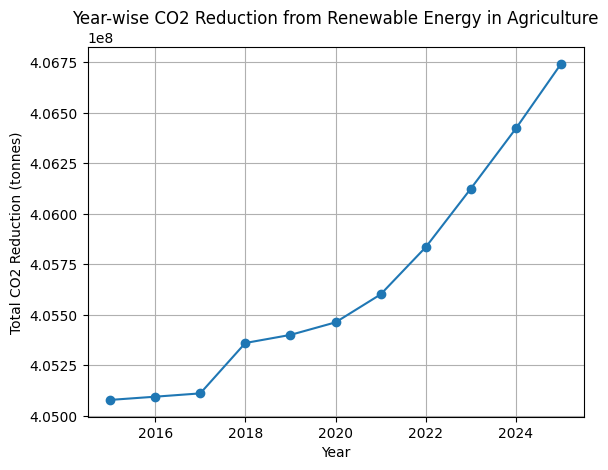

In [26]:
df["year_month"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str))
yearly_co2 = df.groupby("year")["estimated_co2_reduction_tonnes"].sum().reset_index()

plt.figure()
plt.plot(yearly_co2["year"], yearly_co2["estimated_co2_reduction_tonnes"], marker='o')
plt.xlabel("Year")
plt.ylabel("Total CO2 Reduction (tonnes)")
plt.title("Year-wise CO2 Reduction from Renewable Energy in Agriculture")
plt.grid(True)
plt.show()

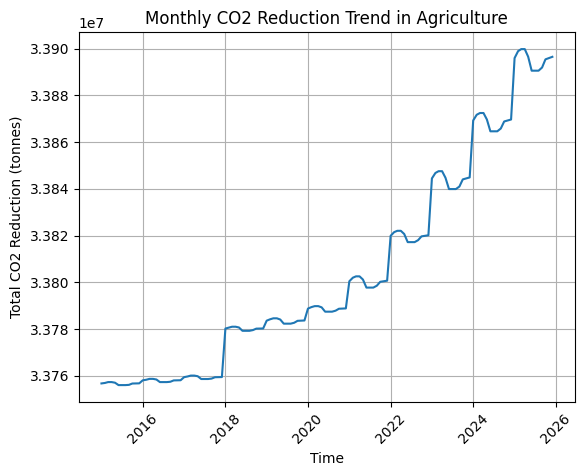

In [27]:
monthly_co2 = df.groupby("year_month")["estimated_co2_reduction_tonnes"].sum().reset_index()

plt.figure()
plt.plot(monthly_co2["year_month"], monthly_co2["estimated_co2_reduction_tonnes"])
plt.xlabel("Time")
plt.ylabel("Total CO2 Reduction (tonnes)")
plt.title("Monthly CO2 Reduction Trend in Agriculture")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

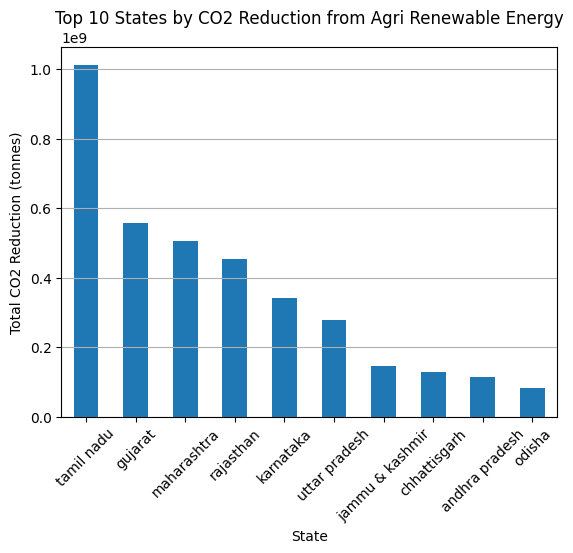

In [28]:
state_co2 = (
    df.groupby("state")["estimated_co2_reduction_tonnes"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
state_co2.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Total CO2 Reduction (tonnes)")
plt.title("Top 10 States by CO2 Reduction from Agri Renewable Energy")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


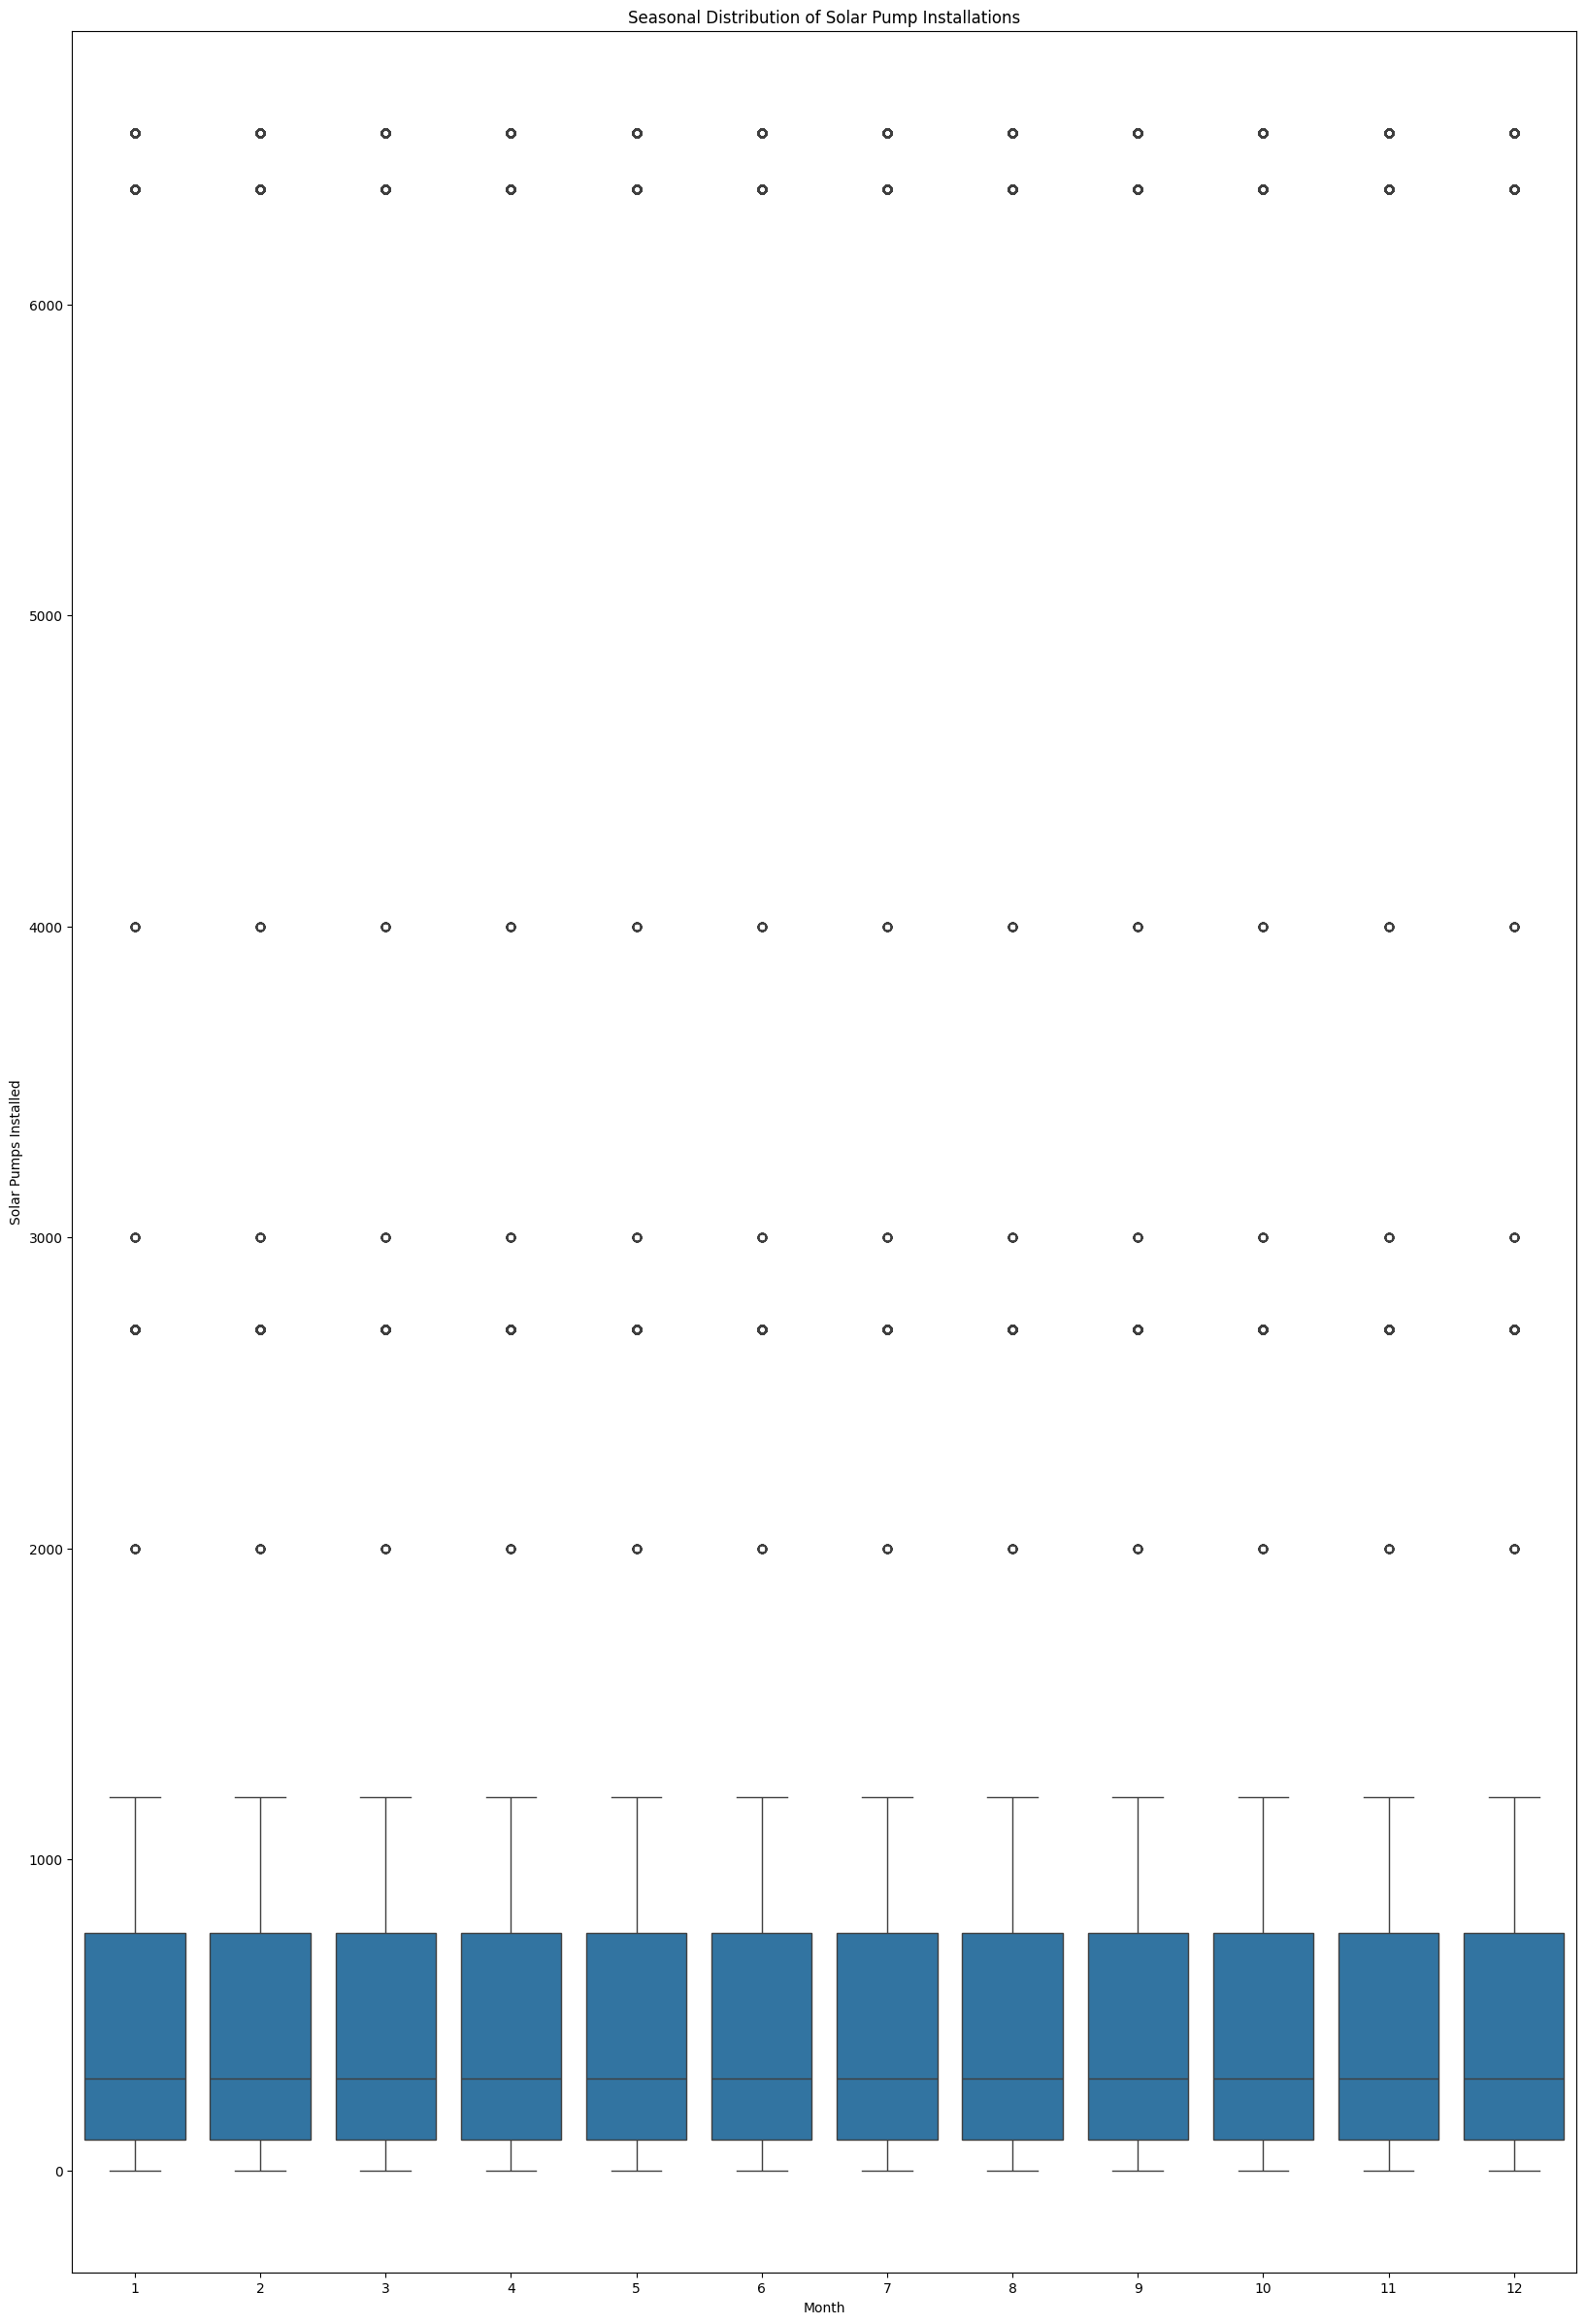

In [30]:
plt.figure(figsize=(20, 30))
sns.boxplot(x="month", y="solar_pumps_installed", data=df)
plt.xlabel("Month")
plt.ylabel("Solar Pumps Installed")
plt.title("Seasonal Distribution of Solar Pump Installations")
plt.show()


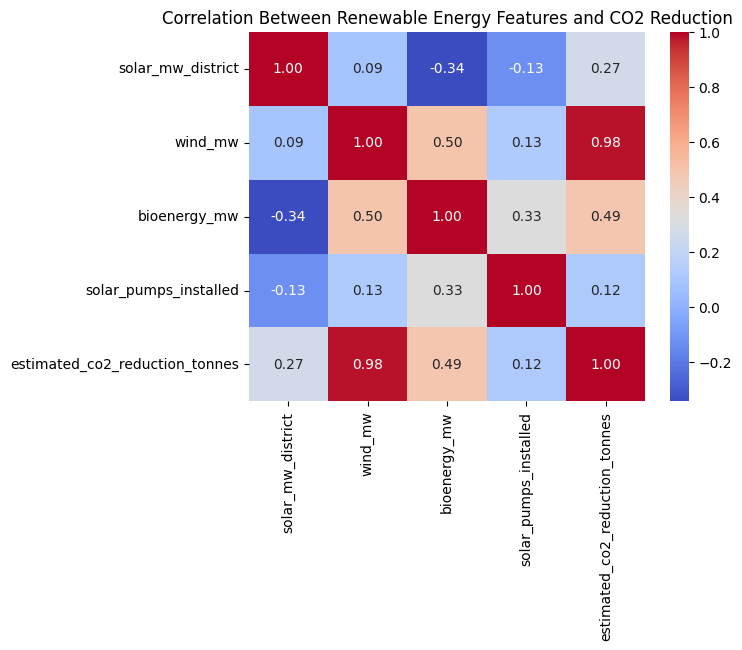

In [32]:
num_cols = [
    "solar_mw_district",
    "wind_mw",
    "bioenergy_mw",
    "solar_pumps_installed",
    "estimated_co2_reduction_tonnes"
]

corr = df[num_cols].corr()

plt.figure()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Renewable Energy Features and CO2 Reduction")
plt.show()

Justifies which features should be priorized in ML models.<br>
this directly supports:

- Regression model for CO₂ prediction
- Feature importance analysis
- Policy evaluation

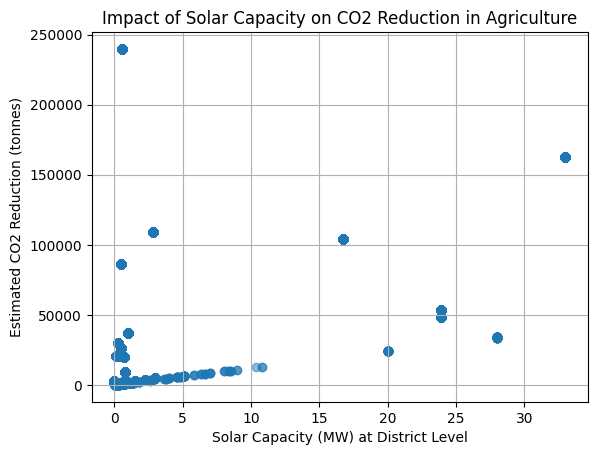

In [33]:
df["year_month"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str))
plt.figure()
plt.scatter(df["solar_mw_district"], df["estimated_co2_reduction_tonnes"], alpha=0.5)
plt.xlabel("Solar Capacity (MW) at District Level")
plt.ylabel("Estimated CO2 Reduction (tonnes)")
plt.title("Impact of Solar Capacity on CO2 Reduction in Agriculture")
plt.grid(True)
plt.show()

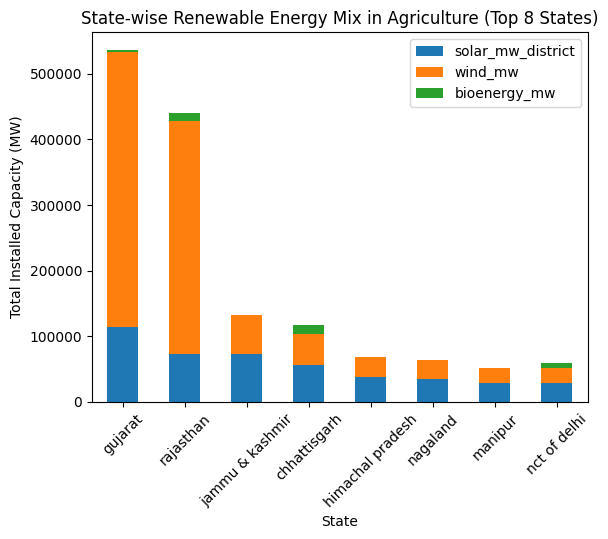

In [34]:
state_energy = df.groupby("state")[["solar_mw_district", "wind_mw", "bioenergy_mw"]].sum()
state_energy_top = state_energy.sort_values("solar_mw_district", ascending=False).head(8)

state_energy_top.plot(kind="bar", stacked=True)
plt.xlabel("State")
plt.ylabel("Total Installed Capacity (MW)")
plt.title("State-wise Renewable Energy Mix in Agriculture (Top 8 States)")
plt.xticks(rotation=45)
plt.show()

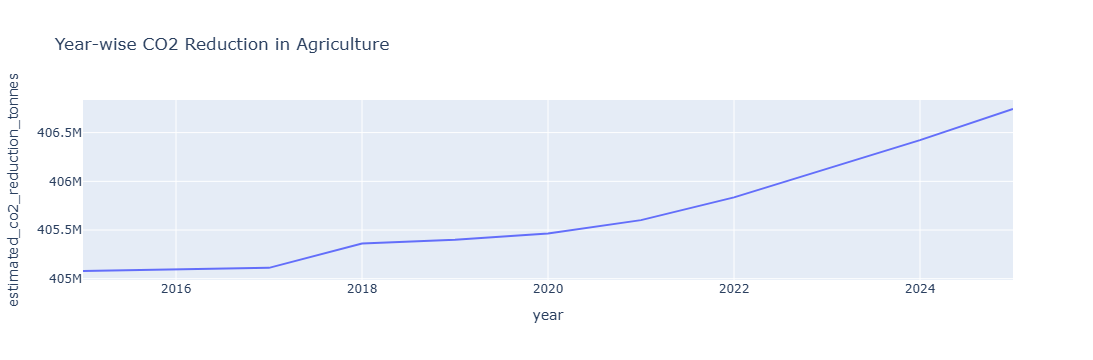

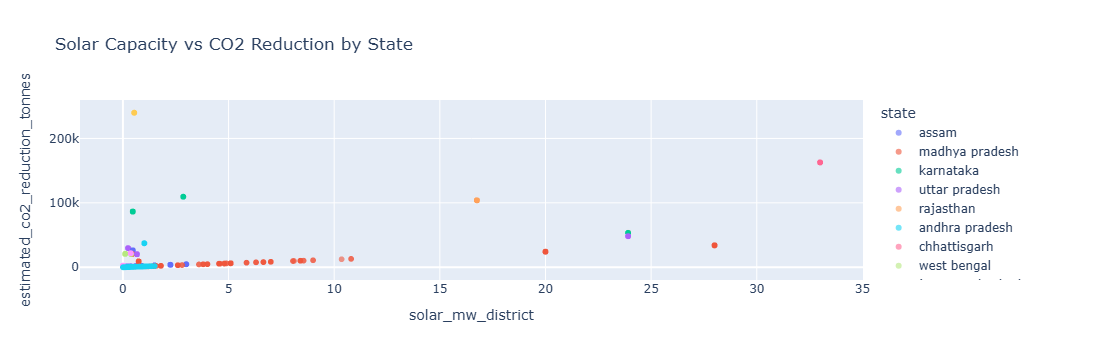

In [35]:

# Time series CO2
yearly = df.groupby("year")["estimated_co2_reduction_tonnes"].sum().reset_index()

fig1 = px.line(yearly, x="year", y="estimated_co2_reduction_tonnes",
               title="Year-wise CO2 Reduction in Agriculture")
fig1.show()

# Scatter interactive
fig2 = px.scatter(df,
                  x="solar_mw_district",
                  y="estimated_co2_reduction_tonnes",
                  color="state",
                  title="Solar Capacity vs CO2 Reduction by State",
                  opacity=0.6)
fig2.show()


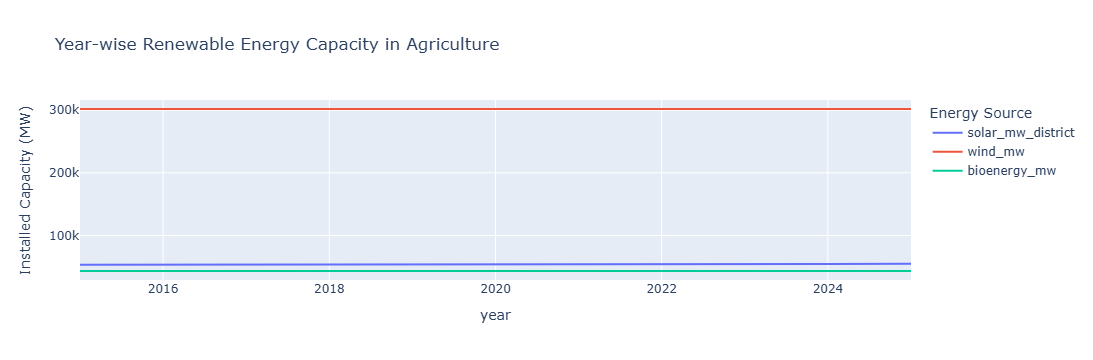

In [36]:
df["year_month"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str))
yearly_energy = df.groupby("year")[["solar_mw_district", "wind_mw", "bioenergy_mw"]].sum().reset_index()

fig = px.line(yearly_energy, x="year",
              y=["solar_mw_district", "wind_mw", "bioenergy_mw"],
              title="Year-wise Renewable Energy Capacity in Agriculture",
              labels={"value": "Installed Capacity (MW)", "variable": "Energy Source"})
fig.show()


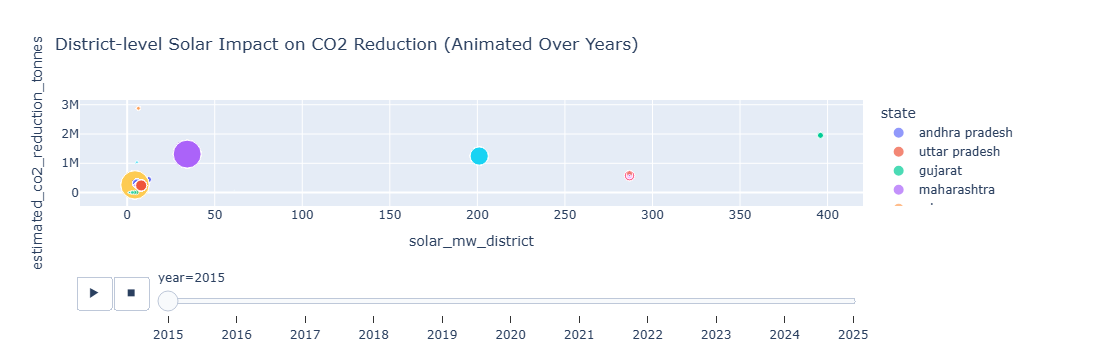

In [37]:
yearly_district = df.groupby(["year", "district", "state"], as_index=False).agg({
    "solar_mw_district": "sum",
    "estimated_co2_reduction_tonnes": "sum",
    "solar_pumps_installed": "sum"
})

fig = px.scatter(
    yearly_district,
    x="solar_mw_district",
    y="estimated_co2_reduction_tonnes",
    size="solar_pumps_installed",
    color="state",
    animation_frame="year",
    hover_name="district",
    title="District-level Solar Impact on CO2 Reduction (Animated Over Years)",
    opacity=0.7
)
fig.show()


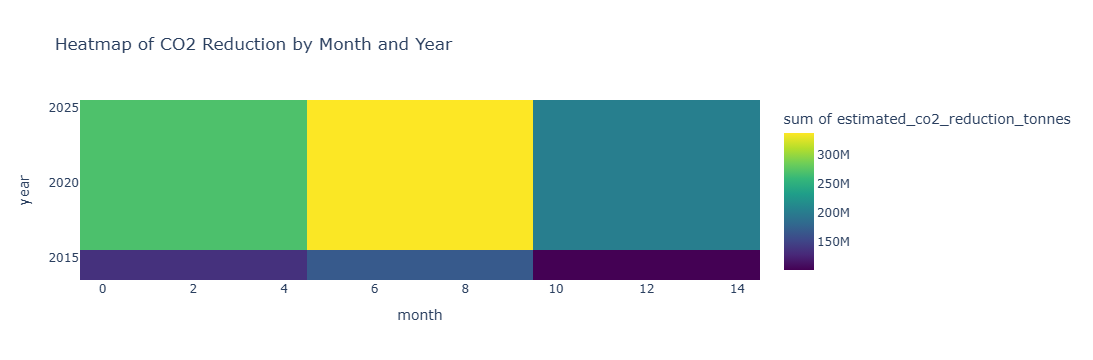

In [38]:
heat_df = df.groupby(["year", "month"])["estimated_co2_reduction_tonnes"].sum().reset_index()

fig = px.density_heatmap(
    heat_df,
    x="month",
    y="year",
    z="estimated_co2_reduction_tonnes",
    color_continuous_scale="Viridis",
    title="Heatmap of CO2 Reduction by Month and Year"
)
fig.show()


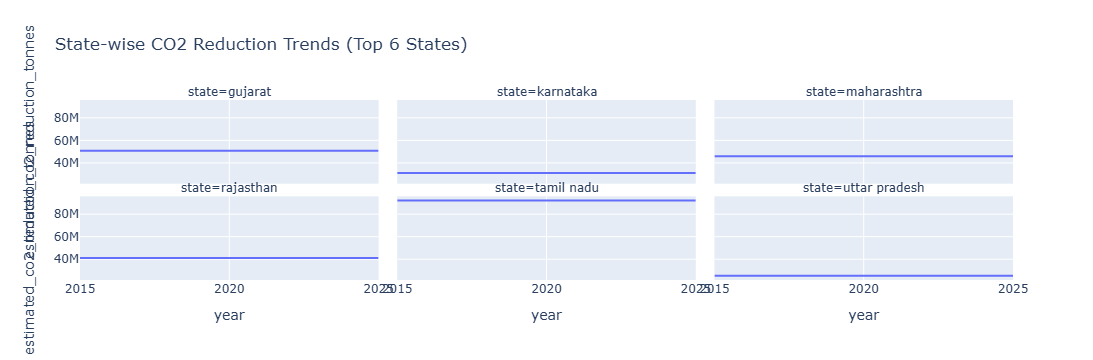

In [39]:
top_states = (
    df.groupby("state")["estimated_co2_reduction_tonnes"]
    .sum().sort_values(ascending=False).head(6).index
)

state_trend = df[df["state"].isin(top_states)]
state_year = state_trend.groupby(["state", "year"], as_index=False)["estimated_co2_reduction_tonnes"].sum()

fig = px.line(
    state_year,
    x="year",
    y="estimated_co2_reduction_tonnes",
    facet_col="state",
    facet_col_wrap=3,
    title="State-wise CO2 Reduction Trends (Top 6 States)"
)
fig.show()


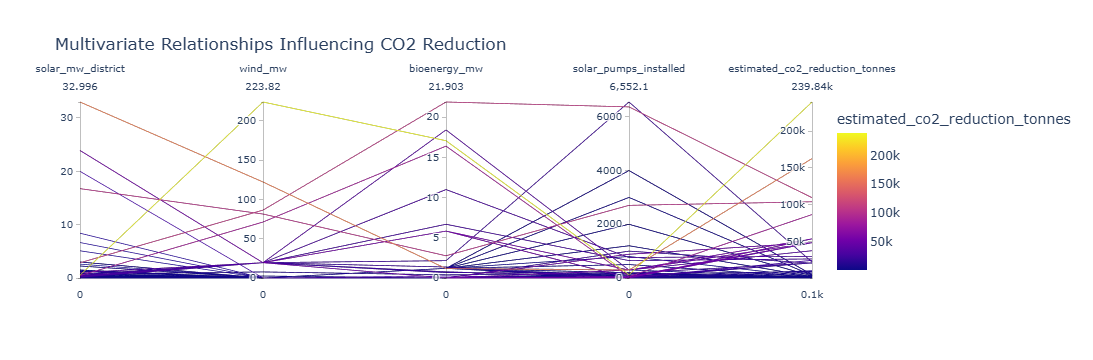

In [40]:
sample_df = df.sample(3000, random_state=42)  # for performance

fig = px.parallel_coordinates(
    sample_df,
    dimensions=[
        "solar_mw_district",
        "wind_mw",
        "bioenergy_mw",
        "solar_pumps_installed",
        "estimated_co2_reduction_tonnes"
    ],
    color="estimated_co2_reduction_tonnes",
    title="Multivariate Relationships Influencing CO2 Reduction"
)
fig.show()


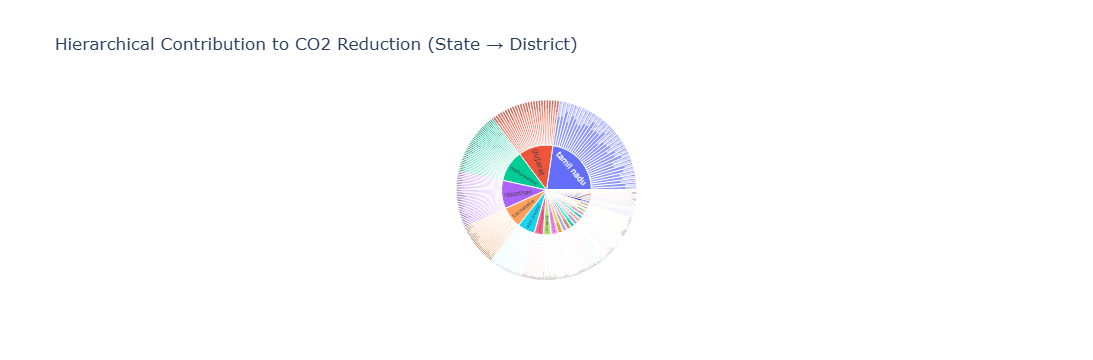

In [41]:
sun_df = df.groupby(["state", "district"], as_index=False)["estimated_co2_reduction_tonnes"].sum()

fig = px.sunburst(
    sun_df,
    path=["state", "district"],
    values="estimated_co2_reduction_tonnes",
    title="Hierarchical Contribution to CO2 Reduction (State → District)"
)
fig.show()
